![CIT-DATA-header](CIT-DATA-header.png)
# CIT Data Cell's first lab : *Olympics Data*


This is a historical dataset on the modern Olympic Games, from Athens 1896 to Rio 2016. Each row consists of an individual athlete competing in an Olympic event and which medal was won (if any).

Not sure where to begin? Scroll to the bottom to find challenges!

## Data Dictionary

|Column   |Explanation                   |
| ------- | ---------------------------- |
|id       |Unique number for each athlete |
|name     |Athlete's name                 |
|sex      |M or F                         |
|age      |Age of the athlete                        |
|height   |In centimeters                 |
|weight   |In kilograms                   |
|team     |Team name                      |
|noc      |National Olympic Committee 3   |
|games    |Year and season                |
|year     |Integer                        |
|season   |Summer or Winter               |
|city     |Host city                      |
|sport    |Sport                          |
|event    |Event                          |
|medal    |Gold, Silver, Bronze, or NA    |

[Source](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) and [license](https://creativecommons.org/publicdomain/zero/1.0/) of the dataset.
The dataset is a consolidated version of data from www.sports-reference.com.

## Data Exploration

## Basic data inspection, exploring our data

In [ ]:
# Importing pandas
import pandas as pd
import matplotlib.pyplot as plt

# Find the data file in the project's directory and create a pd.DataFrame object containing our data.
df = pd.read_csv('data/athlete_events.csv.gz')

- Perform basic data exploration

    1. Display the first few rows of the dataset

    2. Get information about the dataset, such as column names and data types

    3. Generate descriptive statistics of the dataset

    4. Get the dimensions of the dataset (number of rows, number of columns)

    5. Check for missing values in the dataset

In [ ]:
# Display first few rows of the dataset
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# Get information about the dataset, such as column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
# Generate descriptive statistics of the dataset
df.describe()

,id,age,height,weight,year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
# Get the dimensions of the dataset (number of rows, number of columns)
df.shape

(271116, 15)

In [ ]:
# Check for missing values in the dataset
df.isna().sum()

id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

After performing a basic inspection on our data, it's time to answer these questions in order to perform our analysis.

### 🏅 Questions to answer:

1. How many unique Olympic sports are there in the dataset?
2. What unique sports are included in the Olympics dataset?
3. What is the distribution of male and female athletes per sport?
4. How has the number of participating athletes changed over time?
5. Which country has the most gold medals, creating an all-time podium?
6. What is the age distribution of gold medal winners?
7. How many athletes competed in multiple Olympics?
8. In which year and city did the Netherlands win the highest number of medals?
9. Who are the oldest athletes in the dataset?

### 📊 `pivot_table` Sub-Questions:

1. What is the medal count by country?
2. How many gold medals have been won by each country in each Olympic Games?
3. What is the age distribution of athletes by sport?
4. How many men and women participated in each sport?

In [ ]:
# Find the number of unique Olympic sports
num_unique_sports = df['sport'].nunique()
num_unique_sports

66

In [ ]:
# Find the unique sports in the Olympics dataset
unique_sports = df['sport'].unique()
unique_sports


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [ ]:
# Find the sport with the most athletes in the dataset
most_athletes_sport = df['sport'].value_counts().idxmax()
print(f"The sport with the most athletes in the dataset is {most_athletes_sport}")


The sport with the most athletes in the dataset is Athletics


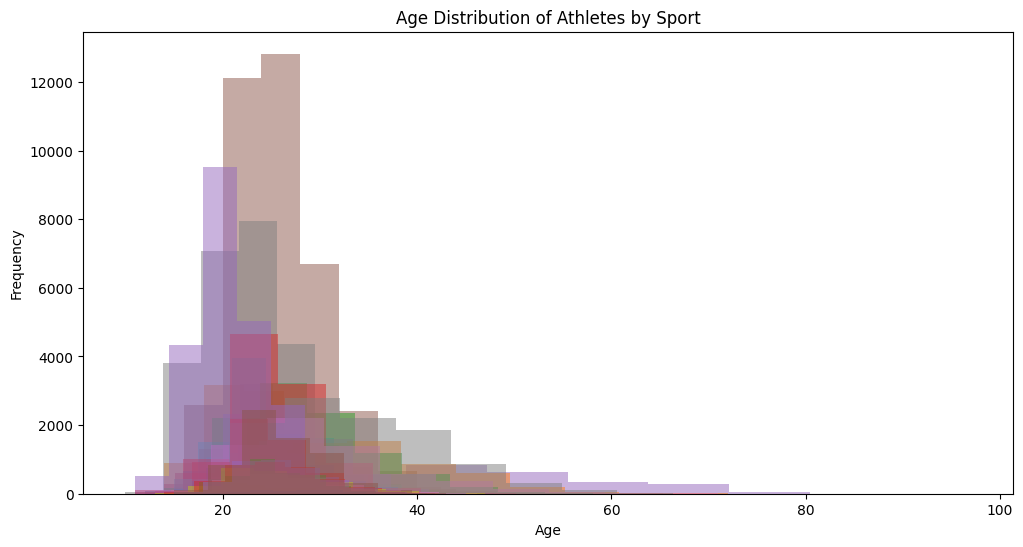

In [ ]:
# Age distribution of athletes by sport
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.groupby('sport')['age'].plot(kind='hist', alpha=0.5, legend=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Athletes by Sport')
plt.show()

In [ ]:
# Male/Female split of athletes per sport
male_female_split = df.groupby(['sport', 'sex']).size().unstack()
male_female_split


sex,F,M
sport,,
Aeronautics,NaN,1.0
Alpine Skiing,3398.0,5431.0
Alpinism,1.0,24.0
Archery,1015.0,1319.0
Art Competitions,377.0,3201.0
...,...,...
Tug-Of-War,NaN,170.0
Volleyball,1543.0,1861.0
Water Polo,488.0,3358.0


<Axes: xlabel='sport'>

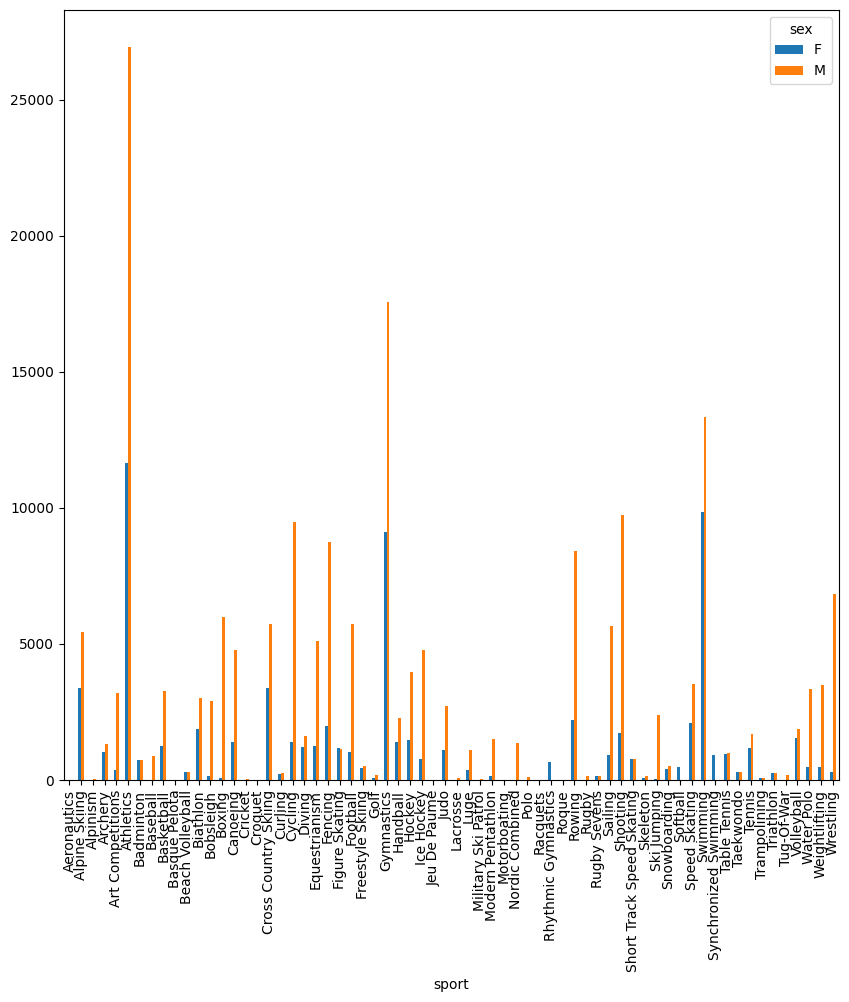

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)
male_female_split.plot(kind='bar')

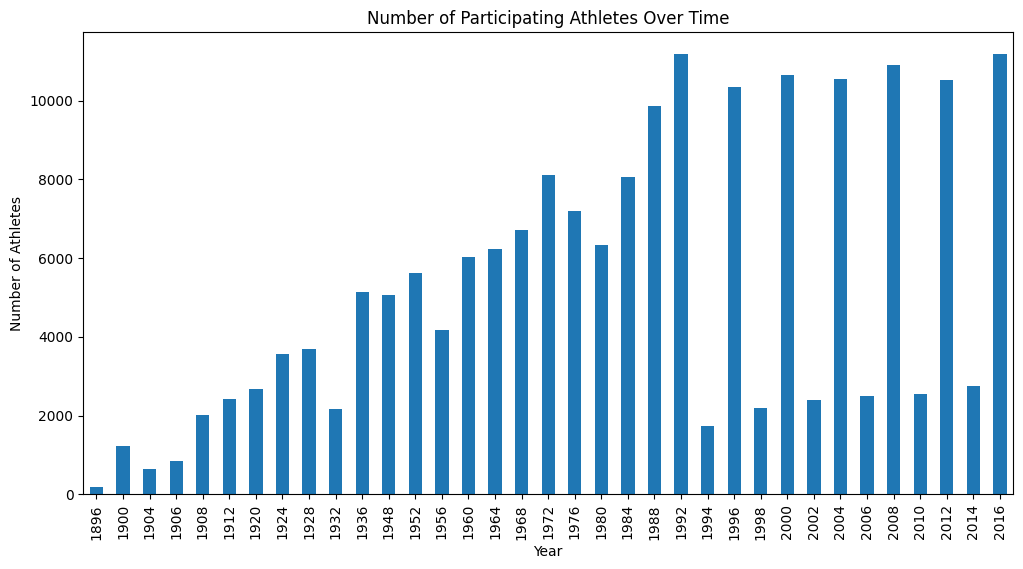

In [ ]:
# Number of participating athletes over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.groupby('year')['id'].nunique().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Participating Athletes Over Time')
plt.show()

In [ ]:
# Country with the most gold medals, creating an all-time podium.
most_gold_medals_country = df[df['medal'] == 'Gold']['noc'].value_counts().head(3)
most_gold_medals_country

USA    2638
URS    1082
GER     745
Name: noc, dtype: int64

In [ ]:
# Male/Female split of athletes per sport
df.groupby('sport')['sex'].value_counts().head(8).to_frame()

sex
sport            sex      
Aeronautics      M       1
Alpine Skiing    M    5431
                 F    3398
Alpinism         M      24
                 F       1
Archery          M    1319
                 F    1015
Art Competitions M    3201

<Figure size 1200x600 with 0 Axes>

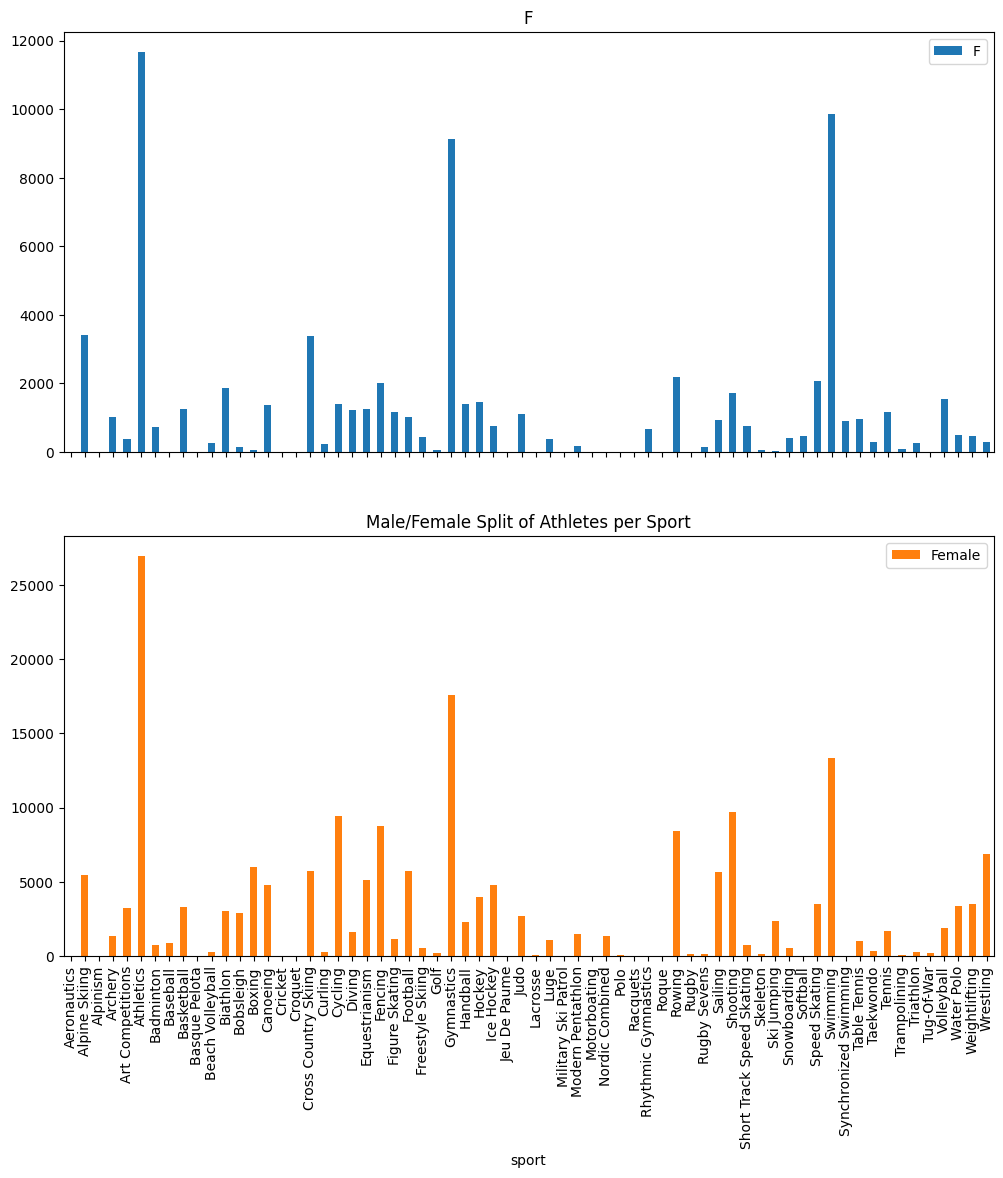

In [ ]:
# Male/Female split of athletes per sport
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.groupby('sport')['sex'].value_counts().unstack().plot(kind='bar', subplots=True, figsize=(12, 12))
plt.title('Male/Female Split of Athletes per Sport')
plt.legend(['Female', 'Male'])
plt.show()

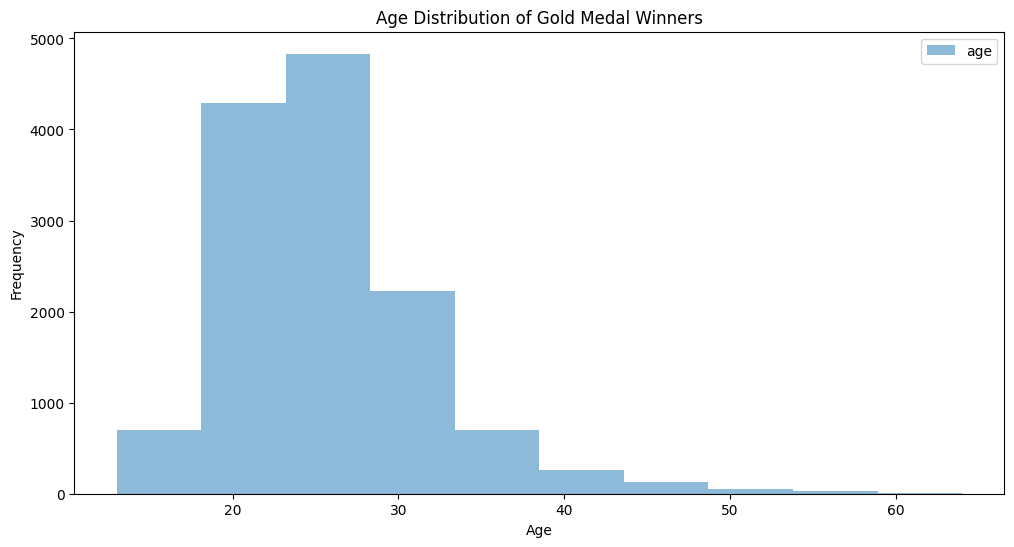

In [ ]:
# Age distribution of gold medal winners
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df[df['medal'] == 'Gold']['age'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Gold Medal Winners')
plt.show()

In [ ]:
# Number of athletes who competed in multiple Olympics
num_multiple_olympics = df['id'].duplicated().sum()
num_multiple_olympics

135545

In [ ]:
# Year and city where the Netherlands won the highest number of medals
netherlands_medals = df[df['noc'] == 'NED'].groupby(['year', 'city'])['medal'].count()
max_medals_year_city = netherlands_medals.idxmax()
max_medals_year_city

(2000, 'Sydney')

In [ ]:
# Oldest athletes in the dataset
oldest_athletes = df[df['age'] == df['age'].max()]
oldest_athletes

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


## `pivot_table` sub-questions

## Medal Count by Country

In [ ]:
# Medal count by country
medal_count_by_country = df.pivot_table(index='noc', columns='medal', values='id', aggfunc='count', fill_value=0)
medal_count_by_country


medal,Bronze,Gold,Silver
noc,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,4
ANZ,5,20,4
ARG,91,91,92
...,...,...,...
VIE,0,1,3
WIF,5,0,0
YUG,93,130,167


## Gold Medals by Country in Each Olympic Games

In [ ]:
# Gold medals won by each country in each Olympic Games
gold_medals_by_country = df[df['medal'] == 'Gold'].pivot_table(index='noc', columns='year', values='id', aggfunc='count', fill_value=0)
gold_medals_by_country


year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
noc,,,,,,,,,,,,,,,,,,,,,
ALG,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
ANZ,0,0,0,0,15,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARG,0,0,0,0,0,0,0,5,3,3,...,0,0,0,28,0,20,0,1,0,21
ARM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AUS,2,3,0,0,0,0,0,4,1,3,...,0,60,2,49,1,31,2,18,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UZB,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,1,0,1,0,4
VEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
VIE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Age Distribution of Athletes by Sport

In [ ]:
# Age distribution of athletes by sport
age_distribution_by_sport = df.pivot_table(index='sport', values='age', aggfunc='mean')
age_distribution_by_sport


,age
sport,
Aeronautics,26.000000
Alpine Skiing,23.205462
Alpinism,38.812500
Archery,27.935226
Art Competitions,45.901009
...,...
Tug-Of-War,29.309524
Volleyball,25.183800
Water Polo,25.659627


## Number of Men and Women Participated in Each Sport

In [ ]:
# Number of men and women participated in each sport
men_women_participation = df.groupby(['sport', 'sex'])['id'].count().unstack()
men_women_participation


sex,F,M
sport,,
Aeronautics,NaN,1.0
Alpine Skiing,3398.0,5431.0
Alpinism,1.0,24.0
Archery,1015.0,1319.0
Art Competitions,377.0,3201.0
...,...,...
Tug-Of-War,NaN,170.0
Volleyball,1543.0,1861.0
Water Polo,488.0,3358.0
